| Übungszettel 12 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 15.07.21 23.15 Uhr |
| Studierende | *bitte Vor- und Nachnamen einfügen* |

### Aufgabe: LR-/QR-Zerlegung mit Nachiteration

1. Implementieren Sie eine Funktion die iterativ Fehlerkorrekturen für das Gleichungssystem $$A x = b$$ mithilfe der Funktion `solve_lr(...)` (vorheriges Übungsblatt) berechnet. Es sei $k$ die Anzahl der Iterationen, sodass für $k=1$ das iterative Verfahren mit `solve_lr(...)` übereinstimmt. Für $k \geq 2$ sprechen wir von einem [LR-Verfahren mit Nachiteration](https://de.wikipedia.org/wiki/Gau%C3%9Fsches_Eliminationsverfahren#Nachiteration). Diskutieren sie die Resultate für verschiedene $k$ bzgl. einer $(n \times n)$ - Hilbertmatrix $A$, $n = 5,\ldots,20$.

2. Implementieren Sie ein direktes Lösungsverfahren `solve_qr(...)` basierend auf der QR-Zerlegung `scipy.linalg.qr(...)`. Verwenden Sie in 1. das QR- anstatt des LR-Verfahrens und vergleichen Sie die Resultate.

3. Diskutieren Sie 1. und 2. für eine $(n \times n)$ - Pascalmatrix $A$, $n = 5,\ldots,20$. Verwenden Sie `scipy.linalg.pascal(n)`.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

1.

In [2]:
def solve_lr(A, b, k = 1):
    x = la.lu_solve(la.lu_factor(A), b)
    for i in range(1, k):
        r = b - A @ x
        x += solve_lr(A, r)
    return x

def test_H_1(n, k = 1):
    H_n = la.hilbert(n)
    x_1 = np.ones(n)
    b = H_n @ x_1
    x_2 = solve_lr(H_n, b, k)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (H_n @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

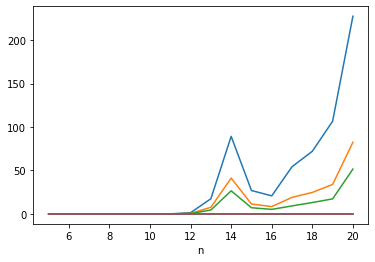

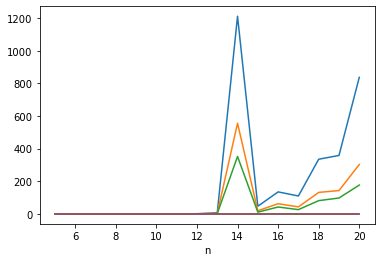

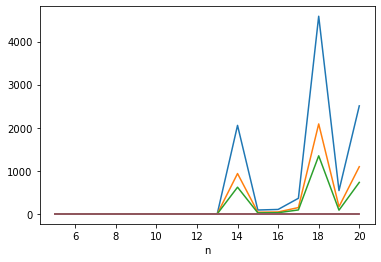

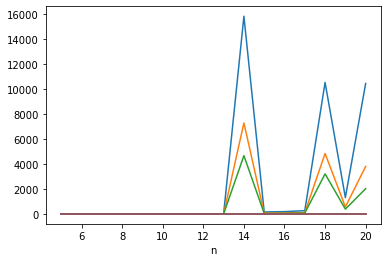

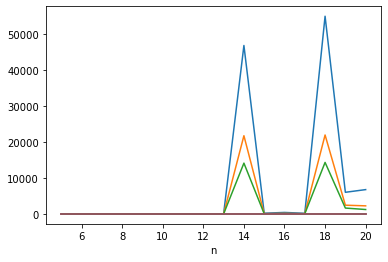

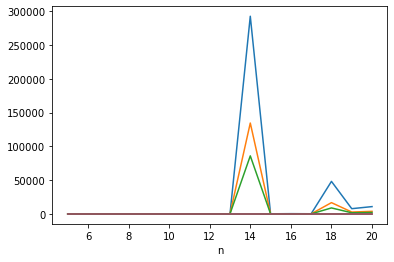

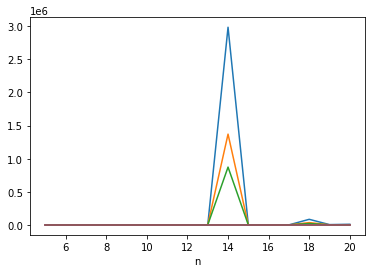

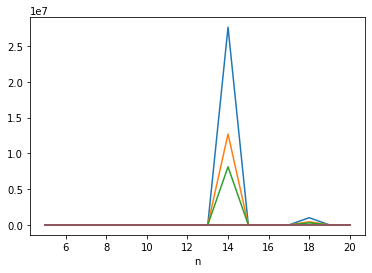

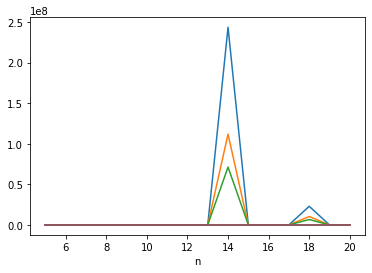

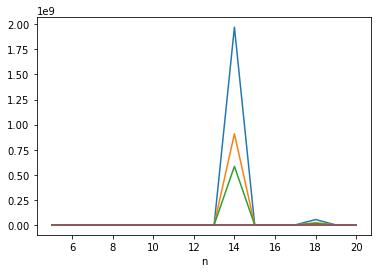

In [3]:
error_1 = np.zeros(160)
error_2 = np.zeros(160)
error_inf = np.zeros(160)
res_1 = np.zeros(160)
res_2 = np.zeros(160)
res_inf = np.zeros(160)

for i in range(error_1.size):
    (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test_H_1(i % 16 + 5, i // 16 + 1)

for i in range(0, 160, 16):
    plt.figure()
    plt.plot(np.arange(5, 21), error_1[i: i + 16], label = r'$|| x - x^*||_1$')
    plt.plot(np.arange(5, 21), error_2[i: i + 16], label = r'$|| x - x^*||_2$')
    plt.plot(np.arange(5, 21), error_inf[i: i + 16], label = r'$|| x - x^*||_\infty$')
    plt.plot(np.arange(5, 21), res_1[i: i + 16], label = r'$|| Hx - b||_1$')
    plt.plot(np.arange(5, 21), res_2[i: i + 16], label = r'$|| Hx - b||_2$')
    plt.plot(np.arange(5, 21), res_inf[i: i + 16], label = r'$|| Hx - b ||_\infty$')
    plt.xlabel("n")

2.

In [4]:
def solve_qr(a, b):
    q, r = la.qr(a)
    return la.solve_triangular(r, q.T @ b)

def solve_lr(A, b, k = 1):
    x = la.lu_solve(la.lu_factor(A), b)
    for i in range(1, k):
        r = b - A @ x
        x += solve_qr(A, r)
    return x

def test_H_1(n, k = 1):
    H_n = la.hilbert(n)
    x_1 = np.ones(n)
    b = H_n @ x_1
    x_2 = solve_lr(H_n, b, k)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (H_n @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

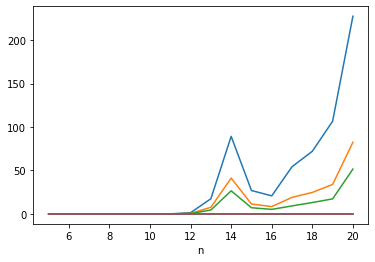

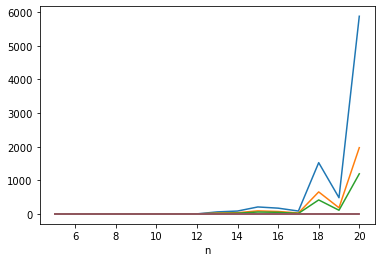

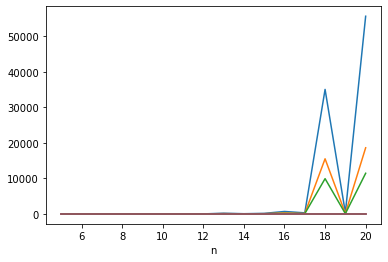

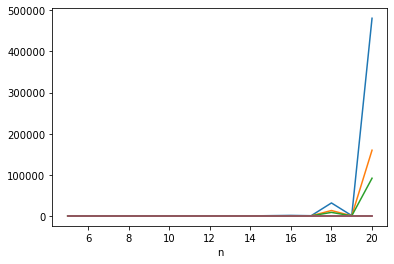

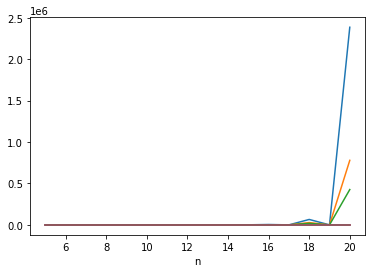

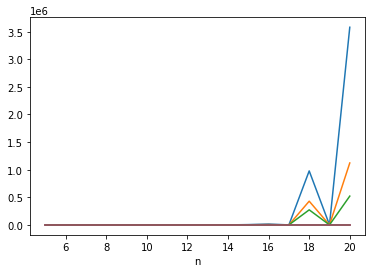

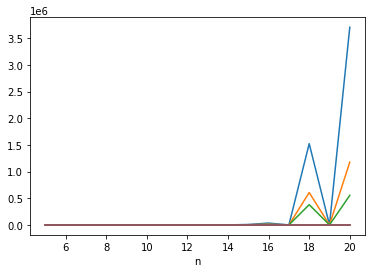

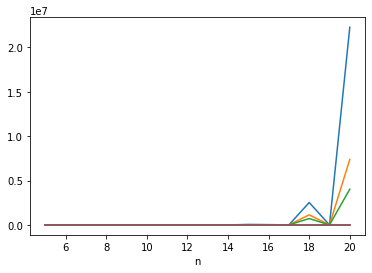

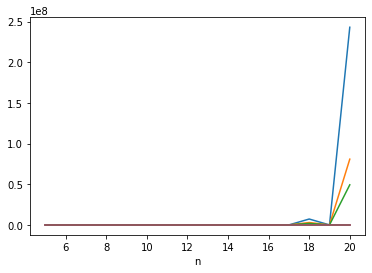

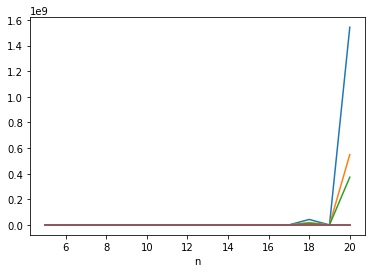

In [5]:
error_1 = np.zeros(160)
error_2 = np.zeros(160)
error_inf = np.zeros(160)
res_1 = np.zeros(160)
res_2 = np.zeros(160)
res_inf = np.zeros(160)

for i in range(error_1.size):
    (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test_H_1(i % 16 + 5, i // 16 + 1)

for i in range(0, 160, 16):
    plt.figure()
    plt.plot(np.arange(5, 21), error_1[i: i + 16], label = r'$|| x - x^*||_1$')
    plt.plot(np.arange(5, 21), error_2[i: i + 16], label = r'$|| x - x^*||_2$')
    plt.plot(np.arange(5, 21), error_inf[i: i + 16], label = r'$|| x - x^*||_\infty$')
    plt.plot(np.arange(5, 21), res_1[i: i + 16], label = r'$|| Hx - b||_1$')
    plt.plot(np.arange(5, 21), res_2[i: i + 16], label = r'$|| Hx - b||_2$')
    plt.plot(np.arange(5, 21), res_inf[i: i + 16], label = r'$|| Hx - b ||_\infty$')
    plt.xlabel("n")

3.

In [6]:
def solve_lr(A, b, k = 1):
    x = la.lu_solve(la.lu_factor(A), b)
    for i in range(1, k):
        r = b - A @ x
        x += solve_lr(A, r)
    return x

def test_P_1(n, k = 1):
    H_n = la.pascal(n)
    x_1 = np.ones(n)
    b = H_n @ x_1
    x_2 = solve_lr(H_n, b, k)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (H_n @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

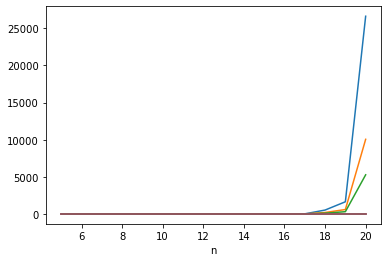

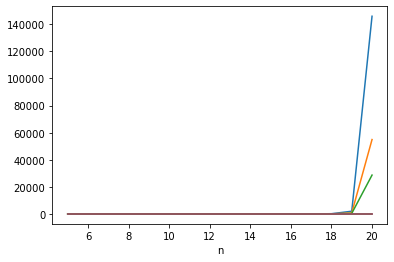

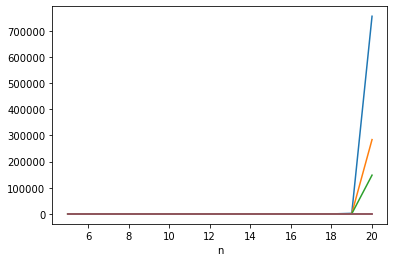

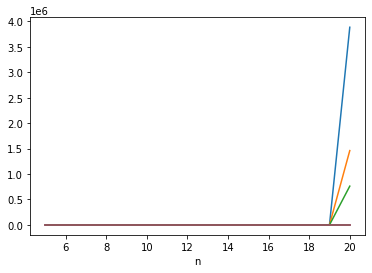

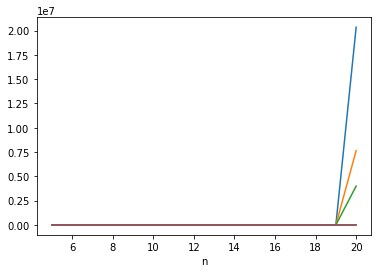

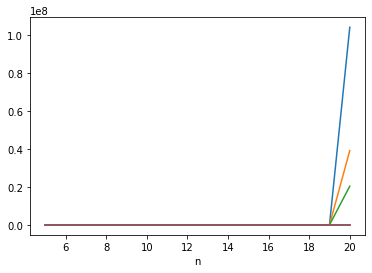

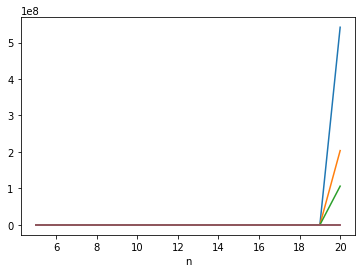

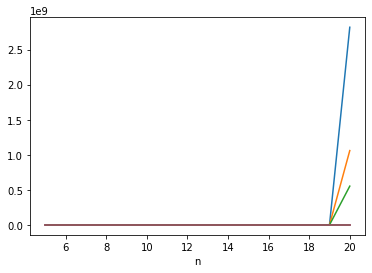

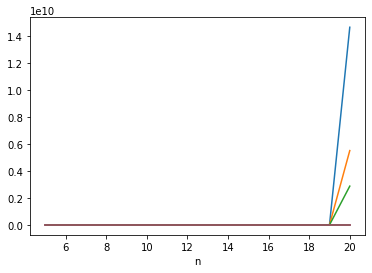

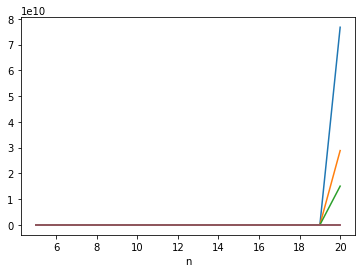

In [7]:
error_1 = np.zeros(160)
error_2 = np.zeros(160)
error_inf = np.zeros(160)
res_1 = np.zeros(160)
res_2 = np.zeros(160)
res_inf = np.zeros(160)

for i in range(error_1.size):
    (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test_P_1(i % 16 + 5, i // 16 + 1)

for i in range(0, 160, 16):
    plt.figure()
    plt.plot(np.arange(5, 21), error_1[i: i + 16], label = r'$|| x - x^*||_1$')
    plt.plot(np.arange(5, 21), error_2[i: i + 16], label = r'$|| x - x^*||_2$')
    plt.plot(np.arange(5, 21), error_inf[i: i + 16], label = r'$|| x - x^*||_\infty$')
    plt.plot(np.arange(5, 21), res_1[i: i + 16], label = r'$|| Hx - b||_1$')
    plt.plot(np.arange(5, 21), res_2[i: i + 16], label = r'$|| Hx - b||_2$')
    plt.plot(np.arange(5, 21), res_inf[i: i + 16], label = r'$|| Hx - b ||_\infty$')
    plt.xlabel("n")

In [8]:
def solve_qr(a, b):
    q, r = la.qr(a)
    return la.solve_triangular(r, q.T @ b)

def solve_lr(A, b, k = 1):
    x = la.lu_solve(la.lu_factor(A), b)
    for i in range(1, k):
        r = b - A @ x
        x += solve_qr(A, r)
    return x

def test_P_1(n, k = 1):
    H_n = la.pascal(n)
    x_1 = np.ones(n)
    b = H_n @ x_1
    x_2 = solve_lr(H_n, b, k)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (H_n @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

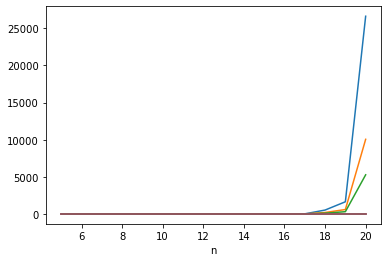

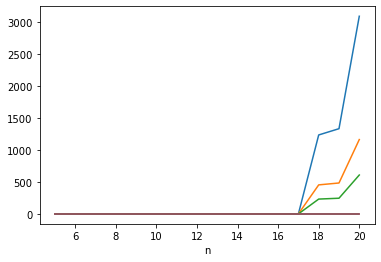

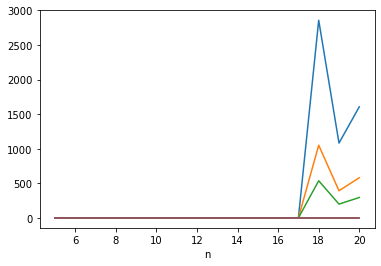

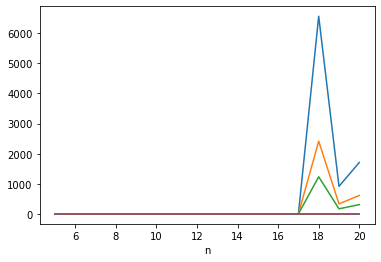

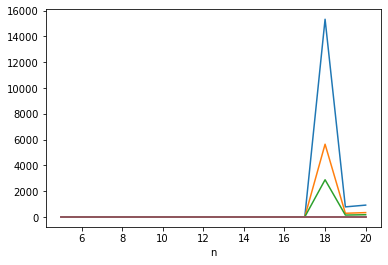

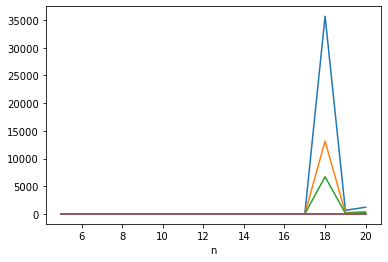

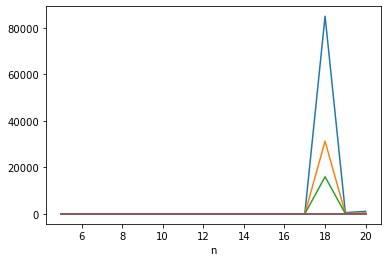

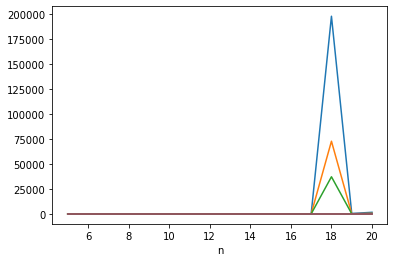

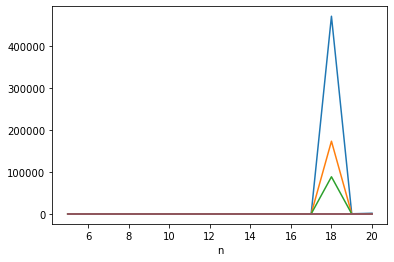

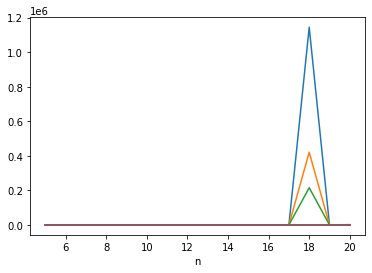

In [9]:
error_1 = np.zeros(160)
error_2 = np.zeros(160)
error_inf = np.zeros(160)
res_1 = np.zeros(160)
res_2 = np.zeros(160)
res_inf = np.zeros(160)

for i in range(error_1.size):
    (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test_P_1(i % 16 + 5, i // 16 + 1)

for i in range(0, 160, 16):
    plt.figure()
    plt.plot(np.arange(5, 21), error_1[i: i + 16], label = r'$|| x - x^*||_1$')
    plt.plot(np.arange(5, 21), error_2[i: i + 16], label = r'$|| x - x^*||_2$')
    plt.plot(np.arange(5, 21), error_inf[i: i + 16], label = r'$|| x - x^*||_\infty$')
    plt.plot(np.arange(5, 21), res_1[i: i + 16], label = r'$|| Hx - b||_1$')
    plt.plot(np.arange(5, 21), res_2[i: i + 16], label = r'$|| Hx - b||_2$')
    plt.plot(np.arange(5, 21), res_inf[i: i + 16], label = r'$|| Hx - b ||_\infty$')
    plt.xlabel("n")